In [2]:
from sklearn import datasets 
import numpy as np 
import pandas as pd
iris = datasets.load_iris() 
X = iris.data 
# Sepal and pedal negth and width 
y = iris.target 
IRIS = pd.DataFrame({'Sepal_Length':X[:,0], 'Sepal_Width':X[:,1], 'Petal_Length':X[:,2], 
                     'Petal_Width':X[:,3], 'Species':y})

In [4]:
IRIS

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
IRIS.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)

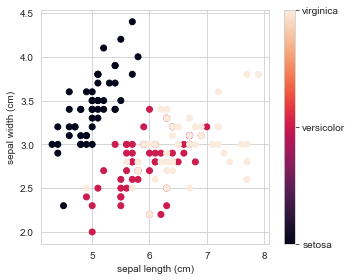

In [15]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver='lbfgs', 
                           multi_class='multinomial') 
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
from sklearn.metrics import confusion_matrix 
y_predict = model.predict(X_test) 
confusion_matrix(y_test, y_predict)

array([[11,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 17]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_predict)*100

95.55555555555556

In [19]:
model.intercept_, model.coef_


(array([  8.75904139,   1.89483705, -10.65387844]),
 array([[-0.33840352,  0.85913732, -2.3175605 , -1.0204201 ],
        [ 0.59432788, -0.44911962, -0.25960645, -0.74153168],
        [-0.25592435, -0.41001771,  2.57716695,  1.76195178]]))